In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



%matplotlib inline


In [157]:
# The list of event file
UNSW_NB15_LIST_EVENTS = pd.read_csv('UNSW-NB15_LIST_EVENTS.csv')
UNSW_NB15_LIST_EVENTS.head()


,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [158]:
# The ground truth table
NUSW_NB15_GT = pd.read_csv('NUSW-NB15_GT.csv')
NUSW_NB15_GT.head()


,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


In [159]:
# The dataset is divided into four parts, let's load all of them
UNSW_NB15_1 = pd.read_csv('UNSW-NB15_1.csv', header=None)
UNSW_NB15_2 = pd.read_csv('UNSW-NB15_2.csv', header=None)
UNSW_NB15_3 = pd.read_csv('UNSW-NB15_3.csv', header=None)
UNSW_NB15_4 = pd.read_csv('UNSW-NB15_4.csv', header=None)

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [160]:
# Combine four parts
UNSW_NB15_dataset = pd.concat([UNSW_NB15_1, UNSW_NB15_2, UNSW_NB15_3, UNSW_NB15_4], ignore_index=True)
UNSW_NB15_dataset.head()



,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [161]:
# Shape of the dataset
UNSW_NB15_dataset.shape



(2540047, 49)

In [162]:
# Feature description
NUSW_NB15_features = pd.read_csv('NUSW-NB15_features.csv', encoding='unicode_escape')
NUSW_NB15_features


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [163]:
# Change the name of columns in the dataset based on what we have in feature description
UNSW_NB15_dataset.columns = list(NUSW_NB15_features.Name)
UNSW_NB15_dataset.head()



,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [164]:
# Define a function to output some information
# about columns' data types, missing values, ...
def data_report(dataset):
    

    #DataFrame with columns
    columns = pd.DataFrame(list(dataset.columns.values[:]))

    #DataFrame with data types
    data_types = pd.DataFrame(dataset.dtypes, columns=['Data Type'])

    #DataFrame with Count
    data_count = pd.DataFrame(dataset.count(), columns=['Count'])

    #DataFrame with unique values
    unique_value_counts = pd.DataFrame(columns=['Unique Values'])
    for v in list(dataset.columns.values):
        unique_value_counts.loc[v] = [dataset[v].nunique()]

    missing_data_counts = pd.DataFrame(dataset.isnull().sum(), columns=['Missing Values'])
    data_quality_report = data_types.join(data_count).join(unique_value_counts).join(missing_data_counts)
    
    return(data_quality_report)


In [165]:
# Let's see the output of our function
data_report(UNSW_NB15_dataset) 


,Data Type,Count,Unique Values,Missing Values
srcip,object,2540047,43,0
sport,object,2540047,100341,0
dstip,object,2540047,47,0
dsport,object,2540047,128297,0
proto,object,2540047,135,0
state,object,2540047,16,0
dur,float64,2540047,587303,0
sbytes,int64,2540047,14155,0
dbytes,int64,2540047,19166,0
sttl,int64,2540047,13,0


In [167]:
# 0:Normal, 1: Attack
# We are dealing with unbalanced dataset, Around 87 % normal, and around 13 % attack labels
UNSW_NB15_dataset.Label.value_counts()/len(UNSW_NB15_dataset)


0    0.873513
1    0.126487
Name: Label, dtype: float64

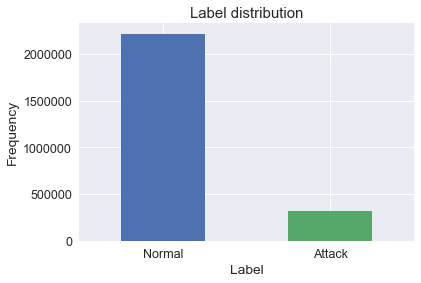

In [183]:
count_classes = pd.value_counts(UNSW_NB15_dataset['Label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Label distribution")
plt.xticks(range(2), ['Normal', 'Attack'])
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()



In [168]:
# There are lots of missing values in 'attack_cat', 'is_ftp_login', and 'ct_flw_http_mthd' columns
# We will drop these columns
UNSW_NB15_dataset = UNSW_NB15_dataset.drop(['attack_cat', 'is_ftp_login','ct_flw_http_mthd'], axis=1)
UNSW_NB15_dataset.shape


(2540047, 46)

In [169]:
# Drop 'Stime' and 'Ltime' from dataset, we do not need them
UNSW_NB15_dataset = UNSW_NB15_dataset.drop(['Stime', 'Ltime'], axis=1)
UNSW_NB15_dataset.shape


(2540047, 44)

In [170]:
# Drop 'ct_ftp_cmd' from dataset, because it has lots of incorrect values
UNSW_NB15_dataset = UNSW_NB15_dataset.drop(['ct_ftp_cmd'], axis=1)
UNSW_NB15_dataset.shape


(2540047, 43)

In [171]:
# There are lots of empty values for 'service' column
UNSW_NB15_dataset.service[UNSW_NB15_dataset.service=='-'].count()


1246397

In [172]:
# Let's drop 'service' column from the dataset
UNSW_NB15_dataset = UNSW_NB15_dataset.drop(['service'], axis=1)
UNSW_NB15_dataset.shape


(2540047, 42)

In [173]:
# Convert 'sport', 'dsport' columns to numeric and drop incorrect values if any
UNSW_NB15_dataset.sport = UNSW_NB15_dataset.sport.apply(lambda x: pd.to_numeric(x, errors='coerce'))
UNSW_NB15_dataset.dsport = UNSW_NB15_dataset.dsport.apply(lambda x: pd.to_numeric(x, errors='coerce'))
UNSW_NB15_dataset = UNSW_NB15_dataset.dropna()


In [174]:
# There were (2540047 - 2539739 = 308) incorrect values in 'sport' and 'dsport' column
UNSW_NB15_dataset.shape


(2539739, 42)

In [175]:
# Categorical columns
UNSW_NB15_dataset.select_dtypes(include=['object']).head()


,srcip,dstip,proto,state
0,59.166.0.0,149.171.126.6,udp,CON
1,59.166.0.0,149.171.126.9,udp,CON
2,59.166.0.6,149.171.126.7,udp,CON
3,59.166.0.5,149.171.126.5,udp,CON
4,59.166.0.3,149.171.126.0,udp,CON


In [176]:
# statistical properties of numeric columns
UNSW_NB15_dataset[UNSW_NB15_dataset.select_dtypes(exclude = ["object"]).columns].describe()



,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,...,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06
mean,3.053693e+04,1.123510e+04,6.588634e-01,4.340072e+03,3.643201e+04,6.278150e+01,3.077044e+01,5.164547e+00,1.633142e+01,3.694928e+07,...,1.651745e-03,2.611847e-01,9.207912e+00,8.989883e+00,6.439727e+00,6.901640e+00,4.642572e+00,3.593032e+00,6.846557e+00,1.265024e-01
std,2.044122e+04,1.843820e+04,1.392577e+01,5.640940e+04,1.611053e+05,7.462670e+01,4.285192e+01,2.251837e+01,5.659789e+01,1.186041e+08,...,4.060809e-02,6.831310e-01,1.083708e+01,1.082281e+01,8.162330e+00,8.205340e+00,8.478001e+00,6.174758e+00,1.125880e+01,3.324147e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.123100e+04,5.300000e+01,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353769e+05,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,3.169000e+04,8.000000e+01,1.586400e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,4.743900e+04,1.497000e+04,2.147540e-01,3.182000e+03,1.490800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.038365e+06,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,...,1.000000e+00,6.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


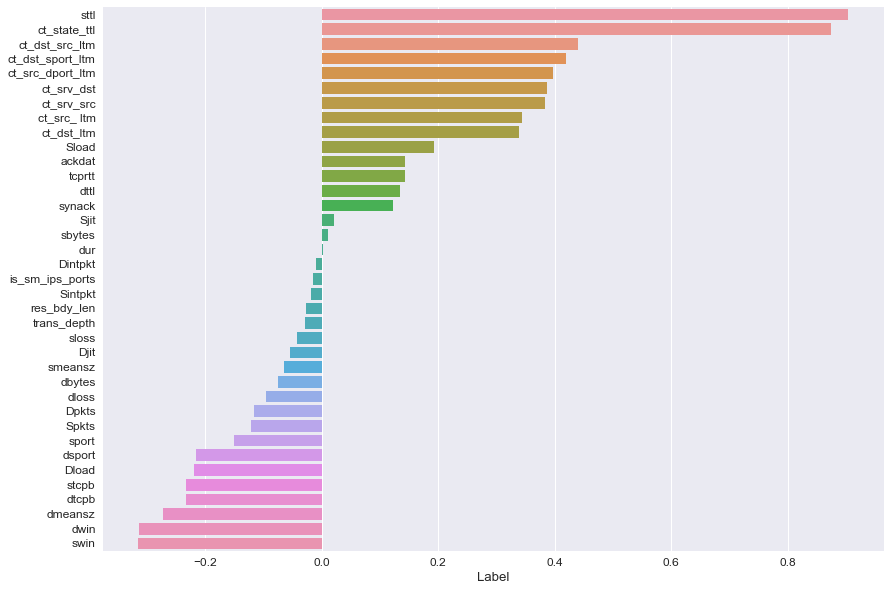

In [177]:
# Feature sorted by correlation to 'Label', from positive to negative
corr = UNSW_NB15_dataset.corr()
corr = corr.sort_values('Label', ascending=False)
plt.figure(figsize=(14,10))
sns.set(font_scale=1.2)
sns.barplot( corr.Label[1:], corr.index[1:], orient='h')
#plt.savefig('data_cor.png', bbox_inches='tight')
plt.show()



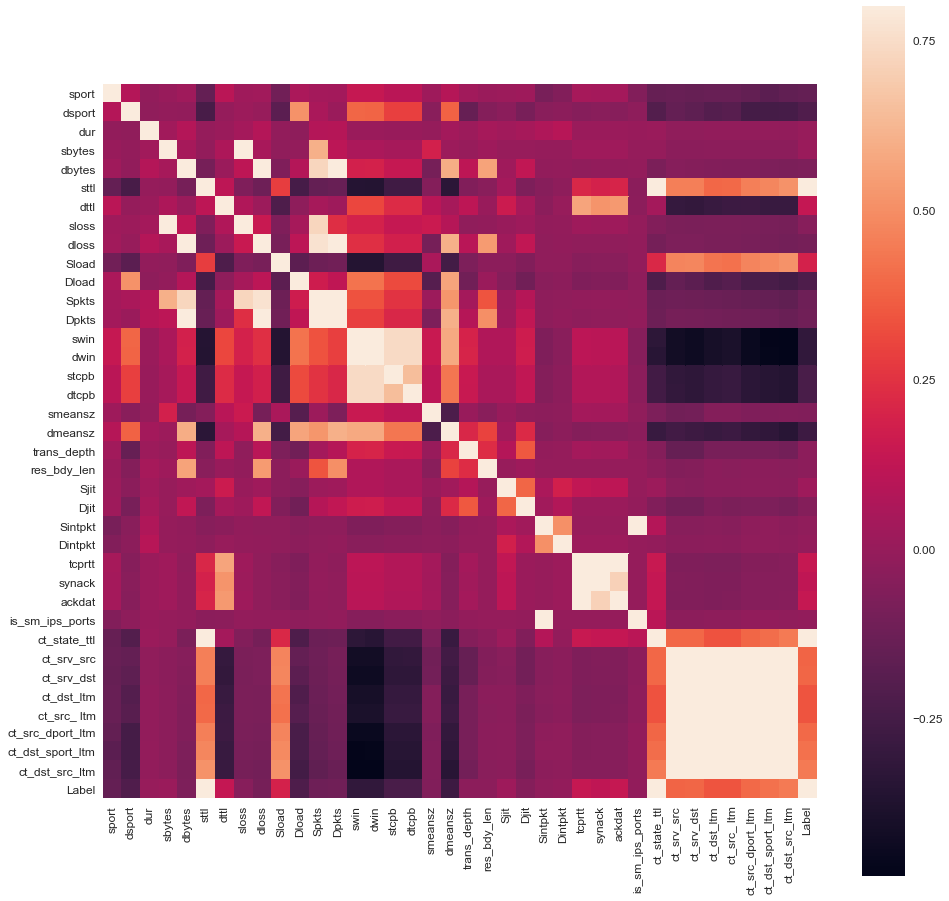

In [178]:
corrmat = UNSW_NB15_dataset.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


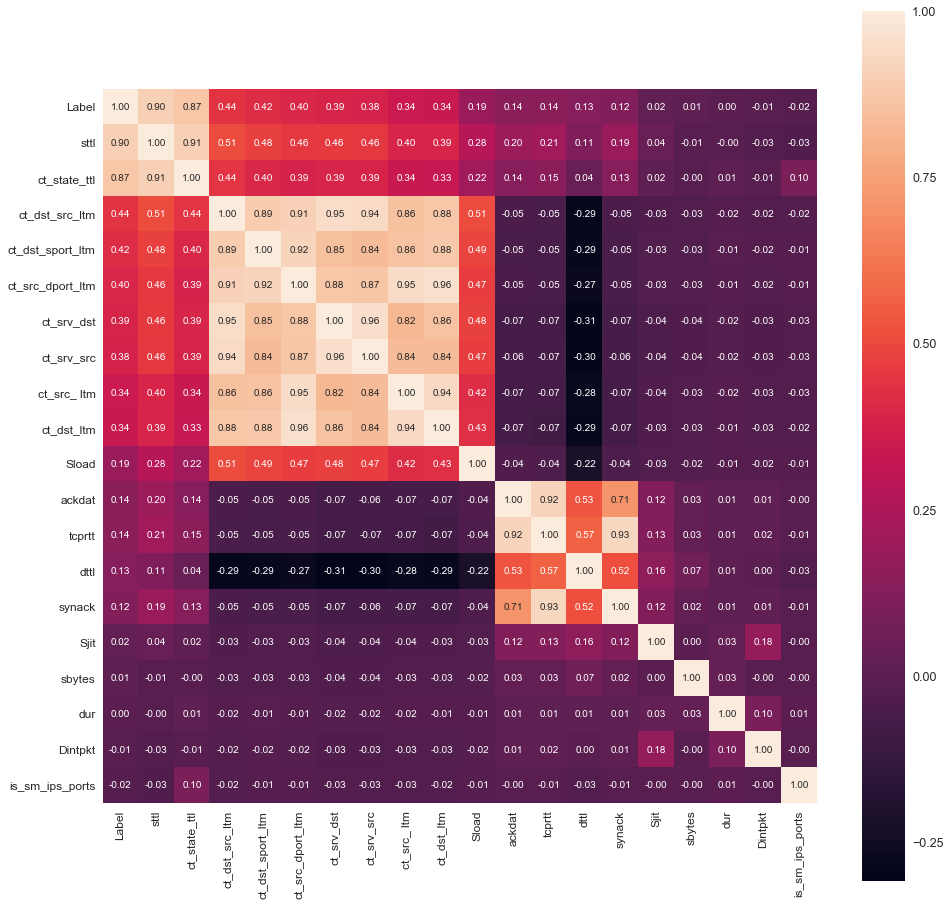

In [179]:
#  correlation matrix of 'Label' column
k = 20 # number of variables for heatmap
cols = corrmat.nlargest(k, 'Label').index
cm = np.corrcoef(UNSW_NB15_dataset[cols].values.T)
f, ax = plt.subplots(figsize=(16, 16))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.savefig('cor_mat.png', bbox_inches='tight')
plt.show()


In [180]:
# Getting dummy categorical features
UNSW_NB15_dataset = pd.get_dummies(UNSW_NB15_dataset)
UNSW_NB15_dataset.shape


(2539739, 278)

In [ ]:
# Label is a categorical feature
# UNSW_NB15_dataset.Label = UNSW_NB15_dataset.Label.astype('object')



In [184]:
# Save the dataframe
UNSW_NB15_dataset.to_csv('UNSW_NB15_dataset.csv',encoding='utf-8')
# Load the clean dataset
UNSW_NB15_dataset = pd.read_csv('UNSW_NB15_dataset.csv',index_col=0)
UNSW_NB15_dataset.head()


/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,1390.0,53.0,0.001055,132,164,31,29,0,0,500473.93750,...,0,0,0,0,0,0,0,0,0,0
1,33661.0,1024.0,0.036133,528,304,31,29,0,0,87676.08594,...,0,0,0,0,0,0,0,0,0,0
2,1464.0,53.0,0.001119,146,178,31,29,0,0,521894.53130,...,0,0,0,0,0,0,0,0,0,0
3,3593.0,53.0,0.001209,132,164,31,29,0,0,436724.56250,...,0,0,0,0,0,0,0,0,0,0
4,49664.0,53.0,0.001169,146,178,31,29,0,0,499572.25000,...,0,0,0,0,0,0,0,0,0,0
